# Chocolate Scraping with Beautiful Soup

The goal of this project is to analyze and manipulate data displayed in a table on a website: `https://content.codecademy.com/courses/beautifulsoup/cacao/index.html`, using BeautifulSoup and pandas that should help us transform this webpage into a DataFrame.

The rating scale is from 1-5. A 1 is “unpleasant” chocolate, while a 5 is a bar that transcends “beyond the ordinary limits”. 

In [28]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Let’s make a request to this site to get the raw HTML and turn it into a BeautifulSoup object.

In [29]:
page = requests.get('https://content.codecademy.com/courses/beautifulsoup/cacao/index.html')
soup = bs(page.content, 'html.parser')

How many bad chocolate bars are out there? And how many earned a perfect 5? Let’s make a histogram to see general distributon of this data.

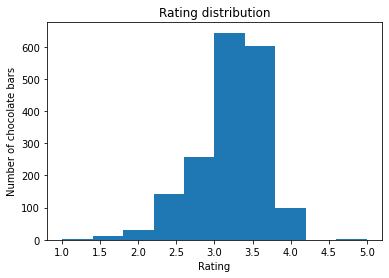

<Figure size 432x288 with 0 Axes>

In [30]:
# Scrape ratings info
ratings = [float(rating.text) for rating in soup.find_all(attrs={'class': 'Rating'})[1:]]
# Plot general distributon 
plt.hist(ratings)
plt.title('Rating distribution')
plt.xlabel('Rating')
plt.ylabel('Number of chocolate bars')
plt.show()
plt.clf()

Which chocolatier makes the best chocolate? Let's find 10 companies with best ratings.

In [31]:
# Scrape companies info
companies = [company.text for company in soup.select('.Company')[1:]]
# Crate DataFrame for data manipulation
data = {'company': companies, 'rating' : ratings}
df = pd.DataFrame.from_dict(data)
# Find mean by company
mean_ratings = df.groupby('company').rating.mean()
# Find 10 best
ten_best = mean_ratings.nlargest(10)
ten_best

company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: rating, dtype: float64

Is more cacao better? We want to see if the chocolate experts tend to rate chocolate bars with higher levels of cacoa to be better than those with lower levels of cacoa.

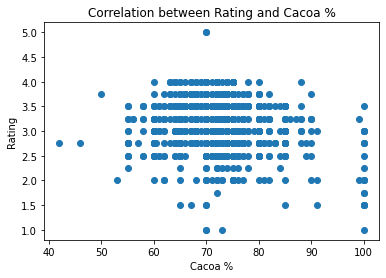

In [32]:
# Scrape companies info
cocoa = [float(cocoa.text.strip('%')) for cocoa in soup.select('.CocoaPercent')[1:]]
# Add it to existing DataFrame
df['cocoa_percentage'] = cocoa
# Plot scatterplot of ratings
plt.scatter(df.cocoa_percentage, df.rating)
plt.title('Correlation between Rating and Cacoa %')
plt.xlabel('Cacoa %')
plt.ylabel('Rating')
plt.show()

Is there any correlation here? We can use some numpy commands to draw a line of best-fit over the scatterplot.

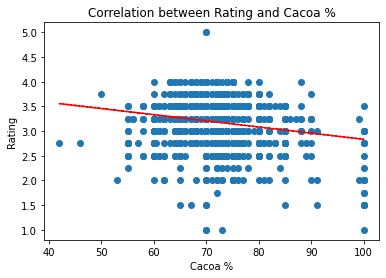

In [33]:
plt.scatter(df.cocoa_percentage, df.rating)
z = np.polyfit(df.cocoa_percentage, df.rating, 1)
line_function = np.poly1d(z)
plt.plot(df.cocoa_percentage, line_function(df.cocoa_percentage), "r--")
plt.title('Correlation between Rating and Cacoa %')
plt.xlabel('Cacoa %')
plt.ylabel('Rating')
plt.show()

## Conclusion

- Average rating for chocolate bars is `3` and `3.5`, number of chocolate bars within those points are about `600` for each.
- Best average rating `4.0` has `Tobago Estate`. 
- Best chocolate has around `60-70%` of cacoa. 
- Chocolate with percentage of cacoa is around `90%` tend to have lower rating.